<a href="https://colab.research.google.com/github/ZahraDehghani99/Heart-Disease-Health-Indicators-Dataset/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification

## Read data and EDA

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# !cd /content/drive/MyDrive/ML_Dr.sajedi/final_proj
# !unzip -q archive.zip

### Data Description
In this notebook, we want to do binary classification. We want to recognize a person has heart disease(1) or not(0) based on some health indicators.

These data are extracted from original data from CDC (centers for disease control and prevention) whose name is [BRFSS](https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system) (behavioral risk factor surveillance system) which consists of 441456 rows and 330 columns. We worked with the cleaned BRFSS version which consists of 22 columns. 

In this data, `HeartDiseaseorAttack` is a target variable and other columns are feature variables.





| Categorical Features      |  Numerical Features    |
| --------------------------| ------------------     |
|  HighBP                   |      BMI              |
|  HighChol                 |      MentHlth         |
|  CholCheck                |      PhysHlth         |
|  Smoker  
|  Stroke
| Diabetes 	
|  PhysActivity 	
|  Fruits 	
|  Veggies 	
|  HvyAlcoholConsump 	
|  AnyHealthcare 	
| NoDocbcCost (no doctor because of cost)	
| GenHlth (1 excellent and 5 poor)      (ordinalvariable)       
|DiffWalk                 
| Sex                      
|  Age    (ordinal variable)                 
|  Education               (ordinal variable)         
|  Income                   (ordinal variable)



In [3]:
DATA_PATH = '/content/drive/MyDrive/ML_Dr.sajedi/final_proj/heart_disease_health_indicators_BRFSS2015.csv'
df = pd.read_csv(DATA_PATH)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
print(f'data shape : {df.shape}')

data shape : (253680, 22)


In [5]:
print(f'data columns type : \n{df.dtypes}')

data columns type : 
HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [6]:
print(f'number of unique values in each column : \n{df.nunique()}')

number of unique values in each column : 
HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


As you can see MentHlth has 31 unique values.

In [7]:
print(f'unique values of MentHlth : {df.MentHlth.unique()}')

unique values of MentHlth : [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]


Let's check for missing values in our data.

In [8]:
print(f'number of null values in data : {df.isnull().sum().sum()}')

number of null values in data : 0


In [9]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Correlation matrix

We can choose features that have more than 0.5 correlation with target.

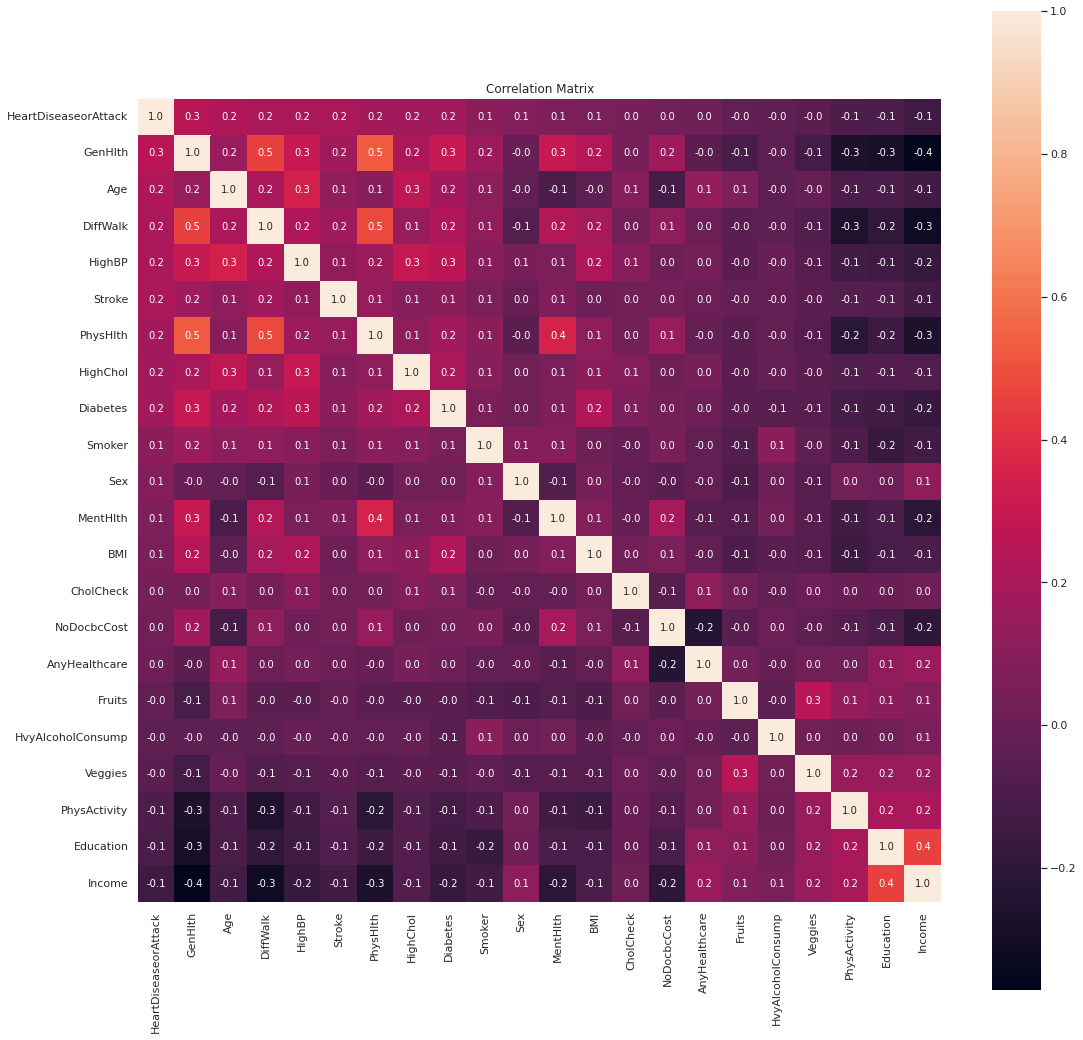

In [ ]:
# correlation matrix
correlation_matrix = df.corr()
k = 22 # number of variables for heatmap
cols = correlation_matrix.nlargest(k,'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(18,18))  # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

we can choose features with more than o.2 correlation with output.

In [ ]:
# #Correlation with output variable
# cor_target = abs(correlation_matrix['HeartDiseaseorAttack'])

# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.2]
# len(relevant_features)


6

In [6]:
# # distribution of first 16 features
# fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(30, 20))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 21:
#     break 
# plt.tight_layout()

### Drop Duplicated rows

In [11]:
duplicated_rows = df[df.duplicated()]
print(f'we have {duplicated_rows.shape[0]} duplicated rows in our data.')

we have 23899 duplicated rows in our data.


let's drop duplicated rows.

In [12]:
df.drop_duplicates(inplace=True)
print(f'data shape after drop duplicated rows : {df.shape}')

data shape after drop duplicated rows : (229781, 22)


### Split X and y

In [13]:
X = df.drop(columns='HeartDiseaseorAttack')
y = pd.DataFrame(df['HeartDiseaseorAttack'])

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X shape : (229781, 21)
y shape : (229781, 1)


Let's take a look at target value distribution.

In [14]:
y.value_counts()

HeartDiseaseorAttack
0.0                     206064
1.0                      23717
dtype: int64

In [34]:
y2 = y.to_numpy()

In [35]:
y2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [ ]:


# data["target"] = [1 if i == 1.0 else 0 for i in data.target] what if i don't do this?



As we can see, we have imbalanced dataset.

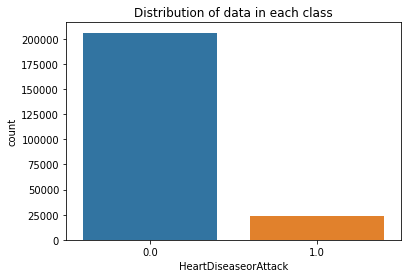

In [15]:
# distribution of data in each class
sns.countplot(x="HeartDiseaseorAttack", data=y)
plt.title("Distribution of data in each class")
plt.show()

let's visulaize our data in 2d space.

In [20]:
!pip install -q umap-learn

     |████████████████████████████████| 86 kB 2.4 MB/s 
     |████████████████████████████████| 1.1 MB 40.7 MB/s 


In [21]:
import umap.umap_ as umap
reducer = umap.UMAP(random_state=42)
reducer.fit(X)
xtr_umap = reducer.transform(X)

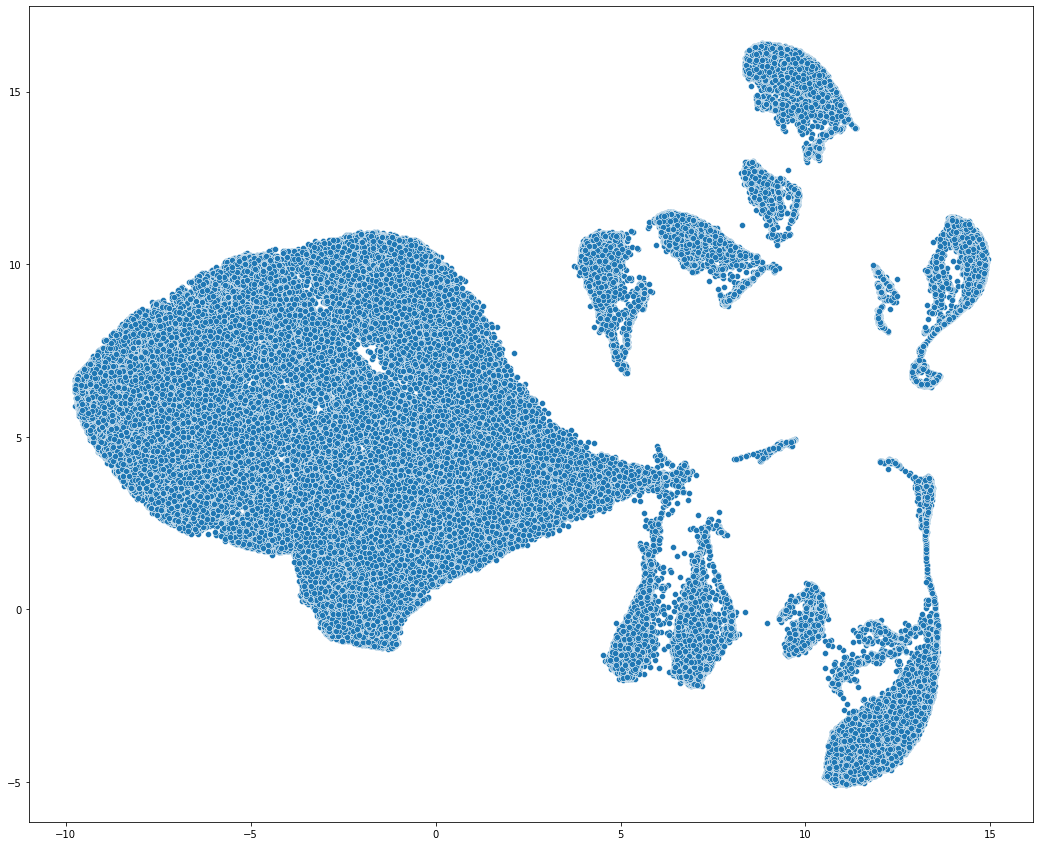

In [37]:
plt.figure(figsize=(18,15))
sns.scatterplot(x=xtr_umap[:,0], y=xtr_umap[:,1], palette='seismic')
plt.show()

### Split train and test set

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (183824, 21)
X_test shape: (45957, 21)
y_train shape: (183824, 1)
y_test shape: (45957, 1)


### Standardization

Let's standardize only numerical columns and ordinal features with more than 2 unique values.

In [39]:
from sklearn.preprocessing import StandardScaler

num_cols = ["BMI", "MentHlth", "PhysHlth"]
cat_ordinal = ["GenHlth", "Diabetes", "Age", "Education", "Income"]
should_sc= num_cols + cat_ordinal
sc = StandardScaler()
X_train[should_sc] = sc.fit_transform(X_train[should_sc])
X_test[should_sc] = sc.transform(X_test[should_sc])

In [40]:
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
82362,1.0,0.0,1.0,-0.249055,1.0,0.0,-0.448896,0.0,0.0,0.0,0.0,1.0,0.0,2.251163,3.438176,2.796650,1.0,0.0,0.617706,-0.988815,-2.337071
251920,0.0,0.0,1.0,-1.426816,1.0,0.0,-0.448896,1.0,1.0,1.0,0.0,1.0,0.0,-0.565182,-0.454350,-0.517075,0.0,0.0,0.940686,0.019086,1.008672
188598,1.0,0.0,1.0,2.400908,0.0,0.0,-0.448896,1.0,1.0,1.0,0.0,1.0,0.0,1.312382,-0.065098,0.035213,1.0,0.0,-0.028253,-0.988815,0.052746
171570,1.0,1.0,1.0,-0.396275,1.0,0.0,-0.448896,0.0,1.0,1.0,0.0,1.0,0.0,-1.503964,-0.454350,-0.517075,0.0,1.0,0.617706,-0.988815,1.008672
71721,1.0,1.0,1.0,0.487046,0.0,1.0,2.312886,0.0,1.0,1.0,0.0,1.0,0.0,0.373600,-0.454350,2.796650,1.0,0.0,1.263665,0.019086,-1.381144


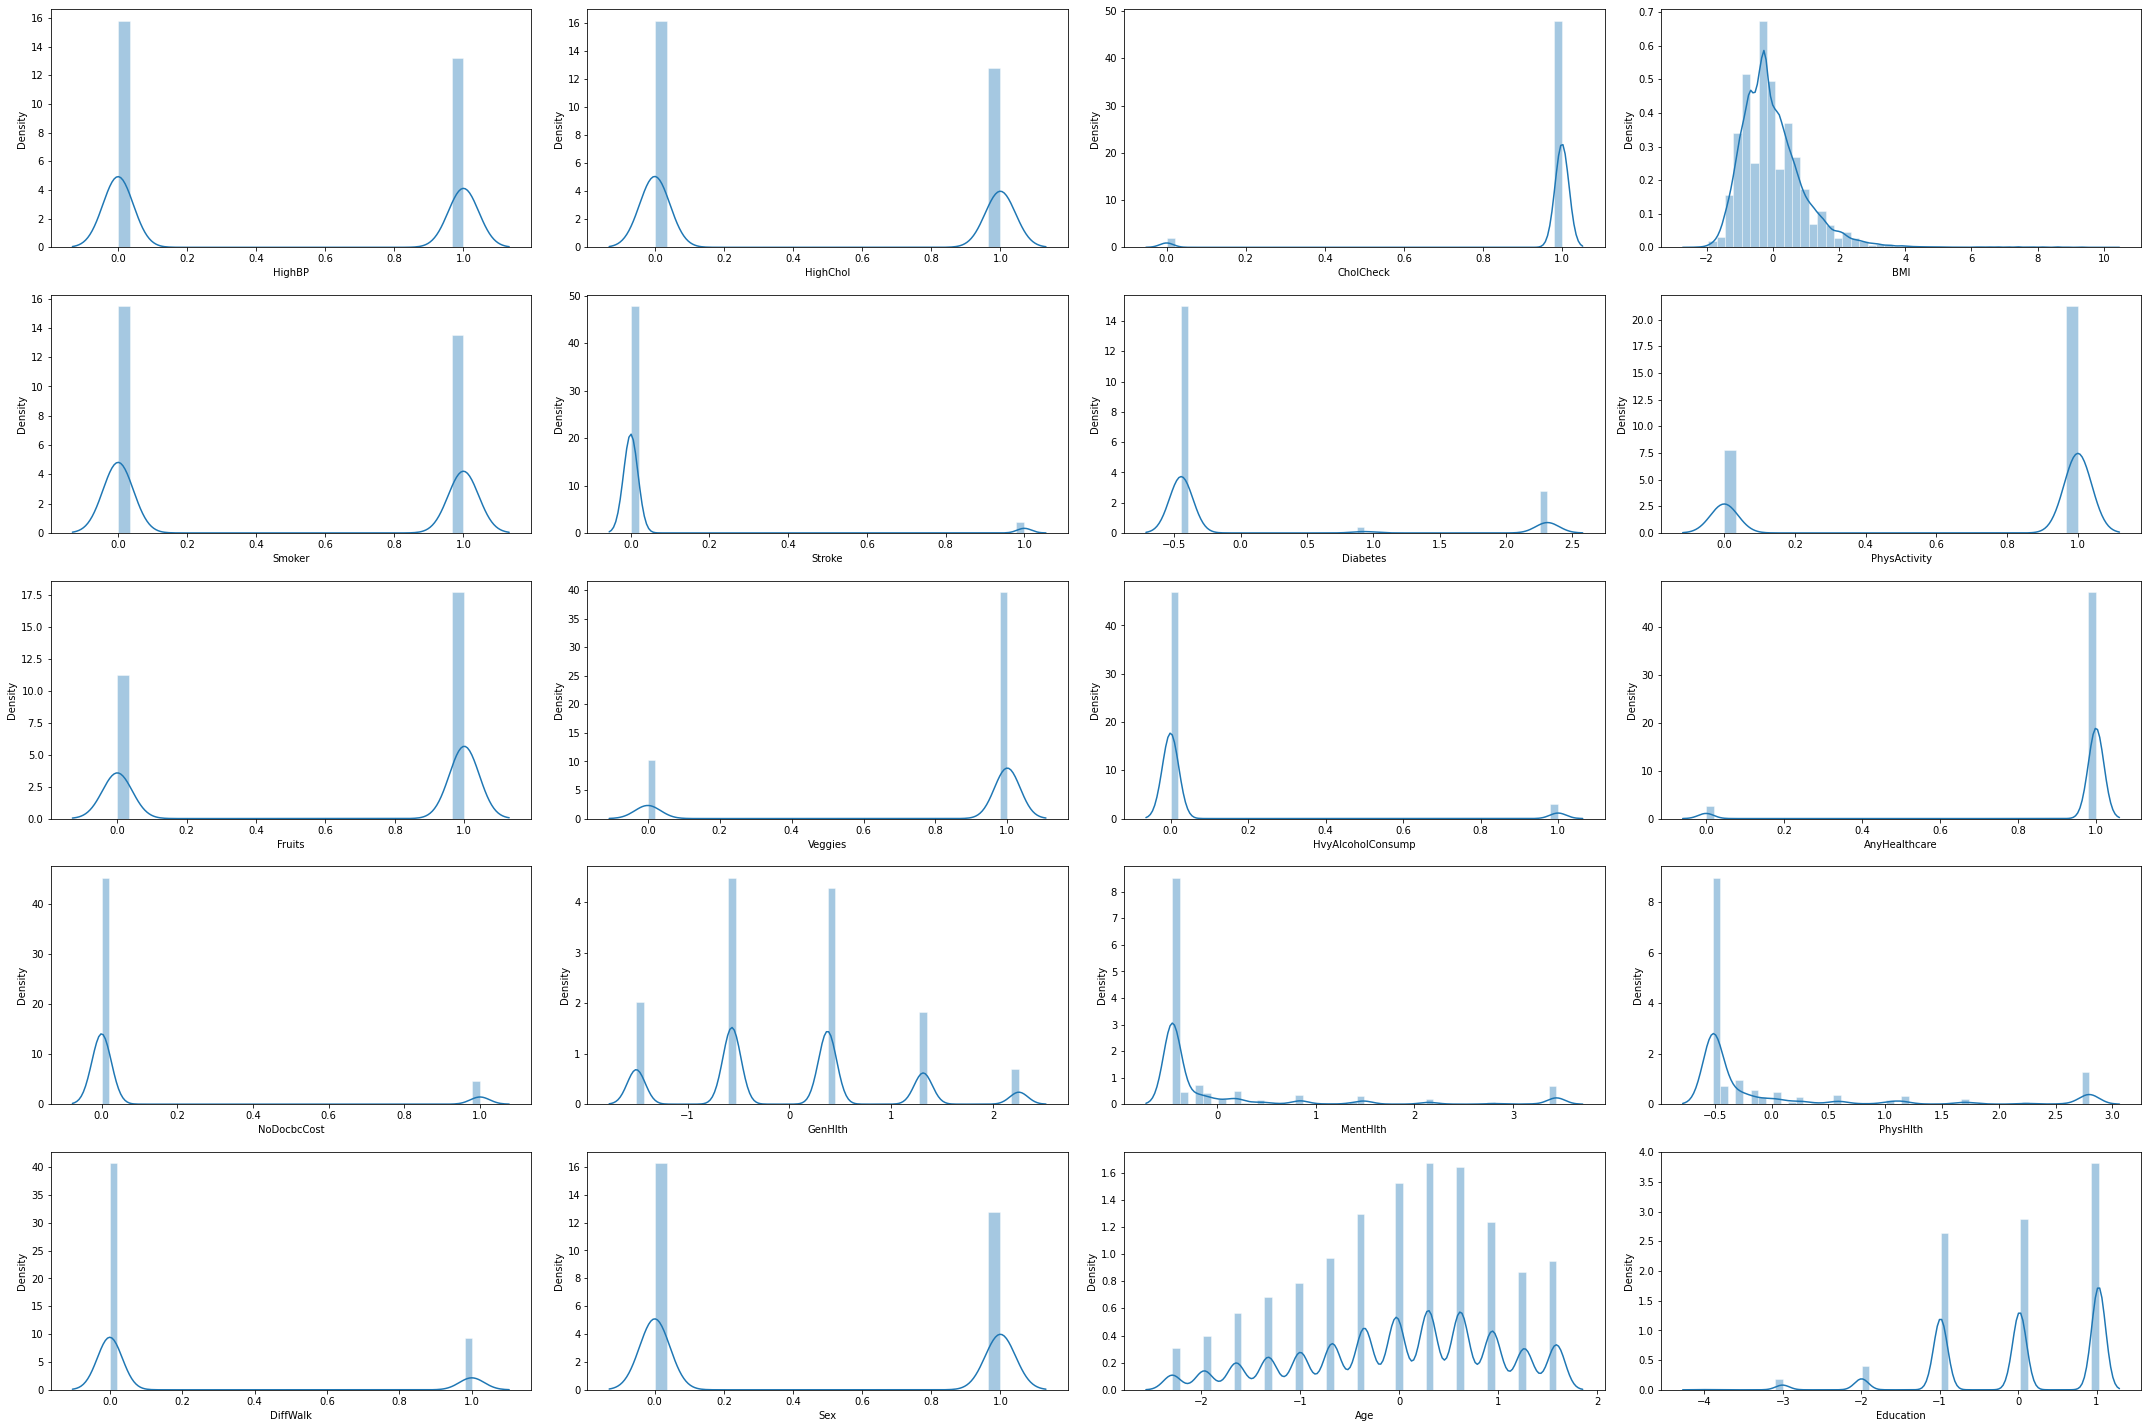

In [41]:
# distribution of first 20 features
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(30, 20))
axs = axs.flatten()
index = 0
sns.set(font_scale = 1)
for k, v in X_train.items():
  sns.distplot(v, ax=axs[index])
  index += 1
  if index == 20:
    break 
plt.tight_layout()

## BaseLine model

Let's construct baseline model. Since data with class =0 are more than data with class =1 in our dataset and we have imbalanced dataset, so we can construct baseline model that predicts all of the inputs as class = 0

In [42]:
def baseline(X):
  y_pred = []
  for i in range(len(X)):
    y_pred.append(0)
  return y_pred

def confusion_matrix(y_test, y_pred):
    df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = [0, 1],
                  columns = [0, 1])
    sns.heatmap(df_cm, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [43]:
y_pred = baseline(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     41214
         1.0       0.00      0.00      0.00      4743

    accuracy                           0.90     45957
   macro avg       0.45      0.50      0.47     45957
weighted avg       0.80      0.90      0.85     45957



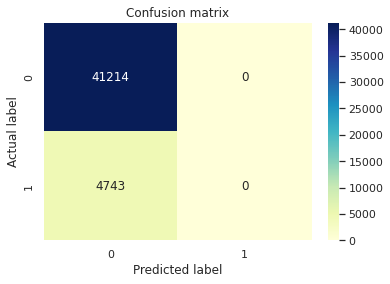

In [44]:
confusion_matrix(y_test, y_pred)

using autoencoder for understanding structure of healthy people, or doing upsampling or downsampling.

## MLP classification

### Prepare data

For MLP we used `Pytorch`. in pytorch we should create class for our dataset then create loader for train and test data and then train the model.

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm

In [46]:
class Heart(Dataset):
    def __init__(self, X, y):
        self.n_samples = X.shape[0]
        # convert DataFrame to numpy array
        X = X.to_numpy()
        y = y.to_numpy()
        # convert numpy to tensor
        self.x_data = torch.from_numpy(X.astype(np.float32)) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(y.astype(np.float32)) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


Let's pass the X_train, X_test, y_train and y_test from EDA section.

In [47]:
# Create data
train_data = Heart(X_train, y_train)
test_data = Heart(X_test, y_test)

In [51]:
# get first sample of train data
x_sample, y_sample = train_data[0]
print(f'elements of x_sample : \n{x_sample[:10]} \nand y_sample : \n{y_sample}')
print(f'x_sample shape : {x_sample.shape} and y_sample shape : {y_sample.shape}')

elements of x_sample : 
tensor([ 1.0000,  0.0000,  1.0000, -0.2491,  1.0000,  0.0000, -0.4489,  0.0000,
         0.0000,  0.0000]) 
and y_sample : 
tensor([0.])
x_sample shape : torch.Size([21]) and y_sample shape : torch.Size([1])


Let's create dataloders for train and test dataset.

In [52]:
# set batch size
# we can define different batch sizes for train and test loaders
BATCH_SIZE=100

In [ ]:
# Create dataloaders
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = False) # 
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)

print(f'length of train data is : {len(train_data)} and length of train loader is : {len(train_loader)}')
print(f'length of test data is : {len(test_data)} and length of test loader is : {len(test_loader)}')

In [ ]:
# get an example of train loader
example= iter(train_loader)

# unpack example
sample_x,sample_y = example.next()
print(f'samples shape : {sample_x.shape} ,labels shape : {sample_y.shape}')

### Create Model

In [ ]:
# create neural network class
class NeuralNet(nn.Module):
  def __init__(self, input_size, num_classes):
    super(NeuralNet, self).__init__()
    self.fc = nn.Sequential(
    nn.Linear(input_size, 100),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(50, 1),
    nn.Sigmoid())

  def forward(self,x):
    out = self.fc(x)
    return out

Let's define necessary functions for train, evaluate and test the model.


In [ ]:
# define a function to calculate accuracy
def accuracy(y_pred, y_act):
  y_pred = torch.round(y_pred)
  correct = (y_pred == y_act)
  acc = correct.sum()/len(correct)
  acc = torch.round(acc*100)
  return acc

# define a function for training a model
def train_fun(model1, train_loader):
  train_epoch_loss = 0
  train_epoch_acc = 0
  model1.train() # train the model
  loop = tqdm(enumerate(train_loader), total = total_step, leave = False)

  for i, batch in loop:
    optimizer.zero_grad()
    x, y = batch # retrieve x and y
    x = x.to(device)
    y = y.to(device)
    y_pred = model1(x)
    loss_train = criterion(y_pred, y)
    acc_train = accuracy(y_pred, y)
    loss_train.backward()
    optimizer.step()

    train_epoch_loss += loss_train.item()
    train_epoch_acc += acc_train.item()
    loop.set_description(f'Epoch : [{epoch}/{num_epoch}]')
    loop.set_postfix(loss = loss_train.item(), accuracy = acc_train.item()) 
  
  train_loss.append(train_epoch_loss/len(train_loader))
  train_acc.append(train_epoch_acc/len(train_loader))  
      
  # # if you want to monitor your model in tensorboard   
  # writer.add_scalar('training loss',train_epoch_loss/len(train_loader) , epoch)
  # writer.add_scalar('training accuracy',train_epoch_acc/len(train_loader) , epoch)
  return train_loss, train_acc

# define a function for evaluating model
def evaluate(model1, valid_loader):
  with torch.no_grad():
    model1.eval()
    val_epoch_loss = 0
    val_epoch_acc = 0

    for batch in valid_loader:
      x, y = batch
      x = x.to(device)
      y = y.to(device)
      y_pred_val = model1(x)
      loss_valid = criterion(y_pred_val, y)
      acc_valid = accuracy(y_pred_val, y) 
      val_epoch_loss += loss_valid.item()
      val_epoch_acc += acc_valid.item()

    valid_loss.append(val_epoch_loss/len(valid_loader))
    valid_acc.append(val_epoch_acc/len(valid_loader))  

    # writer.add_scalar('validation loss',val_epoch_loss/len(valid_loader) , epoch)
    # writer.add_scalar('validation accuracy',val_epoch_acc/len(valid_loader) , epoch)
  return valid_loss, valid_acc

# define a function for evaluating model on test set
def test(model1, test_loader):
  y_pred_test = []
  y_actual_test = []

  model1.eval()
  with torch.no_grad():
    n_true = 0
    n_total = 0
    n_class_correct = [0 for i in range(num_class)]
    n_class_sample = [0 for i in range(num_class)]
  
    for batch in test_loader:
      x, y = batch
      output = model1(x)
      y_predtest = torch.round(output)
      n_true += (y_predtest == y).sum()
      n_total += y.size(0)

      for i in range(len(y_predtest)):
        y_pred_test.append(y_predtest[i])
        y_actual_test.append(y[i].item())

      for i in range(len(y_predtest)):
        lb = int(y[i].item())
        pred = y_predtest[i]
        if pred == lb:
          n_class_correct[lb] += 1
        n_class_sample[lb] += 1   

    print(f'accuracy of network on the {len(test_loader)} data is : {(n_true/n_total) *100}')
  
    for i in range(len(classes)):
      acc = 100.0 * n_class_correct[i] / n_class_sample[i]
      print(f'Accuracy of {classes[i]}: {acc} %')
  
  return y_pred_test, y_actual_test


## AutoEncoder